# Final Project

Cary Burdick, Ismail Abdulrashid, Basiru Usman

This project will explore human activity data as captured by smartphones. The aim of this project is to gather data from the various sensors in a smartphone in order to classify the activity a person is performing. It was our initial goal to also classify the intensity of an activity, but our analysis led us down a different path.

## Packages and Loading Data

In [1]:
# Importing all packages necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from random import seed
from random import randrange
from csv import reader
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
from sklearn import tree
import os
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_auc_score
import pydotplus as pdp
import graphviz
from sklearn.linear_model import Perceptron
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from numpy import pi
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from collections import Counter
from cycler import cycler
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from time import time
from scipy.stats import truncnorm
from numpy import array
from numpy import argmax
from sklearn.preprocessing import OneHotEncoder
from scipy.optimize import minimize
sns.set()
import itertools
from sklearn import svm
from sklearn.metrics import classification_report

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [96]:
# Importing the dataset
df = pd.read_csv("~/Desktop/Machine Learning/Final Project/Data/full.csv")

## Data Manipulation and Train/Test Split

In [97]:
# Splitting into 70% training and 30% testing
random.seed(4)
training_data, testing_data = train_test_split(df, test_size=0.3)

In [98]:
# Counting data in each set and checking for nulls
print("Training Data: {}".format(training_data.shape))
print("Null values?: {}".format(training_data.isnull().values.any()))
print("Testing Data: {}".format(testing_data.shape))
print("Null values?: {}".format(testing_data.isnull().values.any()))

Training Data: (7209, 563)
Null values?: False
Testing Data: (3090, 563)
Null values?: False


In [99]:
# Further splitting into just data and just labels, removing "subject" ID
y_train = training_data["Activity"]
X_train = training_data.drop(columns = ["Activity"])

y_test = testing_data["Activity"]
X_test = testing_data.drop(columns = ["Activity"])

X_train = X_train.drop("subject", axis=1)
X_test = X_test.drop("subject", axis=1)

counting = df["Activity"]

([<matplotlib.patches.Wedge at 0x1a1a652410>,
 [Text(0.912197696055357, 0.6147319442743304, 'LAYING'),
  Text(-0.21486667196758635, 1.0788106012074472, 'SITTING'),
  Text(-1.065601489034256, 0.2729349126952738, 'STANDING'),
  Text(-0.7531828672782088, -0.8016954337144351, 'WALKING'),
  Text(0.2636606321506688, -1.0679340199908935, 'WALKING_DOWNSTAIRS'),
  Text(1.000373282280183, -0.45744212322431943, 'WALKING_UPSTAIRS')],
 [Text(0.49756237966655836, 0.3353083332405438, '18.88%'),
  Text(-0.11720000289141072, 0.5884421461131529, '18.51%'),
  Text(-0.5812371758368668, 0.1488735887428766, '17.25%'),
  Text(-0.41082701851538656, -0.4372884183896918, '16.72%'),
  Text(0.14381489026400116, -0.5825094654495782, '14.99%'),
  Text(0.5456581539710088, -0.2495138853950833, '13.65%')])

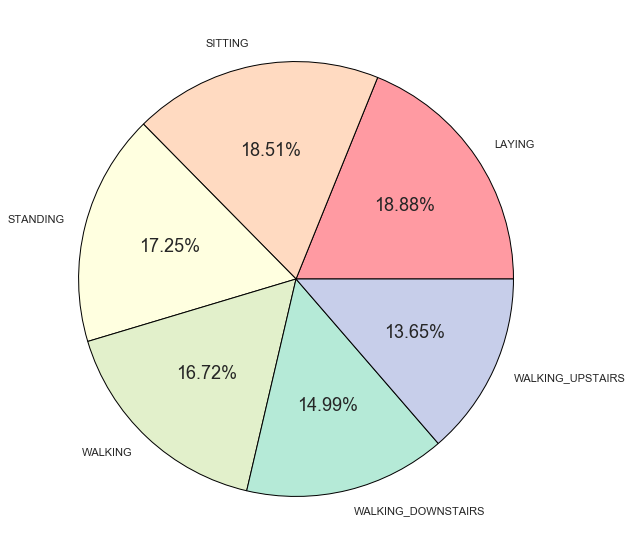

In [6]:
# Count the number of records for each activity
count_of_each_activity = np.array(counting.value_counts())

# Identify all the unqiue activities and sort them
activities = sorted(counting.unique())

colors = ['#ff9aa2','#ffdac1','#ffffe0','#e2f0cb', '#b5ead7', '#c7ceea']

# Pie chart
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 18})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f%%', colors = colors, wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'solid', 'antialiased': True})

In [40]:
# Baseline zero-rule algorithm
def zero_rule(train, test):
    most_common = train['Activity'].value_counts().idxmax()
    count = 0
    for i in test['Activity']:
        if i == most_common:
            count += 1

    accuracy = round(100*count/len(test['Activity']),2)
    print("{}%".format(accuracy))

In [41]:
zero_rule(training_data, testing_data)

18.45%


## Multiple Vanilla Tests

In [10]:
accuracy_scores = np.zeros(7)

#Neural Network
clf = MLPClassifier(activation = "tanh", random_state = 4, max_iter = 1000).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Neural Network Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression(random_state = 4, max_iter = 5000).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# Random Forest
clf = RandomForestClassifier(random_state = 4).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Support Vector Classifier
clf = SVC(random_state = 4).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[3]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[4] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[4]))

#Vanilla Perceptron
clf = Perceptron(random_state = 4).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[5] = accuracy_score(y_test, prediction)*100
print('Vanilla Perceptron Classifier accuracy: {}%'.format(accuracy_scores[5]))

# Decision Tree
clf = tree.DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[6] = accuracy_score(y_test, prediction)*100
print('Decision Tree Classifier accuracy: {}%'.format(accuracy_scores[6]))

Neural Network Classifier accuracy: 98.83495145631068%
Logistic Regression accuracy: 98.3495145631068%
Random Forest Classifier accuracy: 97.70226537216828%
Support Vector Classifier accuracy: 96.957928802589%
K Nearest Neighbors Classifier accuracy: 96.73139158576052%
Vanilla Perceptron Classifier accuracy: 94.49838187702265%
Decision Tree Classifier accuracy: 93.55987055016182%


Text(0.5, 1.0, 'Accuracy of various algorithms')

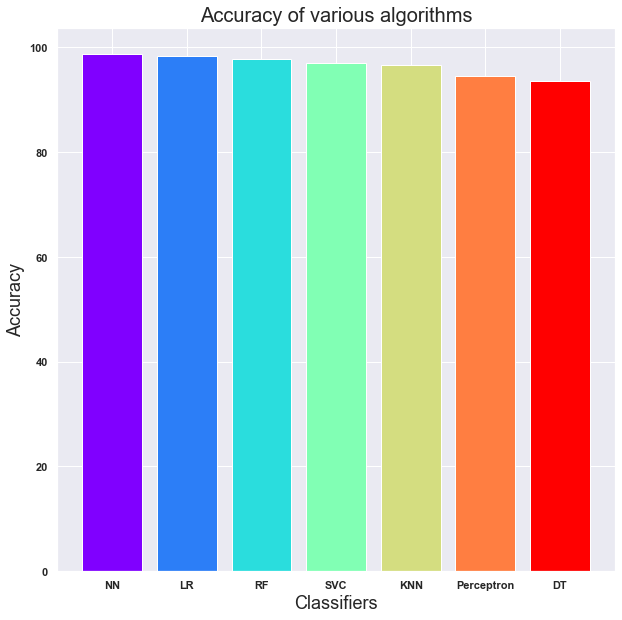

In [11]:
font = {'weight':'bold'}

plt.rc('font', **font)

colors = cm.rainbow(np.linspace(0, 1, 7))
labels = ['NN', 'LR', 'RF', 'SVC', 'KNN', 'Perceptron', 'DT']
plt.bar(labels, accuracy_scores, color = colors)
plt.xlabel('Classifiers', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.title('Accuracy of various algorithms', fontsize = 20)

## Decision Tree

In [12]:
clf = tree.DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores = accuracy_score(y_test, prediction)*100
print('Decision Tree Classifier accuracy: {}%'.format(accuracy_scores))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

Decision Tree Classifier accuracy: 93.46278317152104%


[[587   0   0   0   0   0]
 [  0 468  51   0   0   0]
 [  0  48 542   0   0   0]
 [  0   0   0 472  14  19]
 [  0   0   0   6 411  24]
 [  0   0   0  17  23 408]]


                    precision    recall  f1-score   support

            LAYING     1.0000    1.0000    1.0000       587
           SITTING     0.9070    0.9017    0.9043       519
          STANDING     0.9140    0.9186    0.9163       590
           WALKING     0.9535    0.9347    0.9440       505
WALKING_DOWNSTAIRS     0.9174    0.9320    0.9246       441
  WALKING_UPSTAIRS     0.9047    0.9107    0.9077       448

          accuracy                         0.9346      3090
         macro avg     0.9328    0.9330    0.9328      3090
      weighted avg     0.9348    0.9346    0.9347      3090



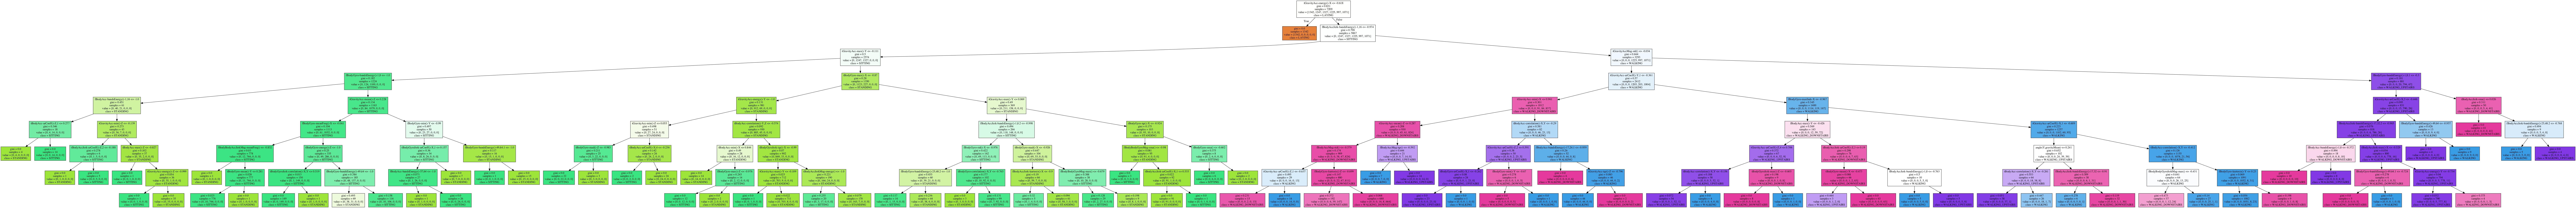

In [21]:
# First method of printing the tree, should have same output as the next cell below
clf = tree.DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)

def print_tree(estimator, features, class_names = None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pdp.graph_from_dot_data(dot_data.getvalue())
    return(graph)

graph = print_tree(clf, features = X_train.columns, class_names=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS'])
Image(graph.create_png())

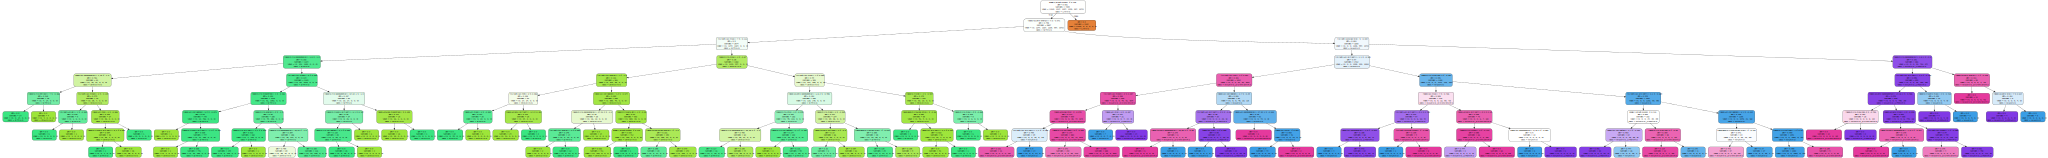

In [94]:
# Second method of printing tree, should have same output as cell above
dot_data = tree.export_graphviz(clf, out_file=None)

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Neural Network

In [100]:
clf = MLPClassifier(activation = "tanh", random_state = 4, max_iter = 1000).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores = accuracy_score(y_test, prediction)*100
print('NN tanh Classifier accuracy: {}%'.format(accuracy_scores))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

NN tanh Classifier accuracy: 98.9967637540453%


[[586   0   0   0   0   0]
 [  0 513  12   0   0   0]
 [  0  19 531   0   0   0]
 [  0   0   0 504   0   0]
 [  0   0   0   0 439   0]
 [  0   0   0   0   0 486]]


                    precision    recall  f1-score   support

            LAYING     1.0000    1.0000    1.0000       586
           SITTING     0.9643    0.9771    0.9707       525
          STANDING     0.9779    0.9655    0.9716       550
           WALKING     1.0000    1.0000    1.0000       504
WALKING_DOWNSTAIRS     1.0000    1.0000    1.0000       439
  WALKING_UPSTAIRS     1.0000    1.0000    1.0000       486

          accuracy                         0.9900      3090
         macro avg     0.9904    0.9904    0.9904      3090
      weighted avg     0.9900    0.9900    0.9900      3090



In [101]:
clf = MLPClassifier(activation = "relu", max_iter = 1000, random_state = 4).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores = accuracy_score(y_test, prediction)*100
print('NN ReLu Classifier accuracy: {}%'.format(accuracy_scores))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

NN ReLu Classifier accuracy: 99.12621359223301%


[[586   0   0   0   0   0]
 [  0 510  15   0   0   0]
 [  0   9 541   0   0   0]
 [  0   0   0 504   0   0]
 [  0   0   0   0 438   1]
 [  0   0   0   2   0 484]]


                    precision    recall  f1-score   support

            LAYING     1.0000    1.0000    1.0000       586
           SITTING     0.9827    0.9714    0.9770       525
          STANDING     0.9730    0.9836    0.9783       550
           WALKING     0.9960    1.0000    0.9980       504
WALKING_DOWNSTAIRS     1.0000    0.9977    0.9989       439
  WALKING_UPSTAIRS     0.9979    0.9959    0.9969       486

          accuracy                         0.9913      3090
         macro avg     0.9916    0.9914    0.9915      3090
      weighted avg     0.9913    0.9913    0.9913      3090



In [102]:
clf = MLPClassifier(activation = "logistic", max_iter = 1000, random_state = 4).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores = accuracy_score(y_test, prediction)*100
print('NN Sigmoid Classifier accuracy: {}%'.format(accuracy_scores))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

NN Sigmoid Classifier accuracy: 99.06148867313915%


[[586   0   0   0   0   0]
 [  0 507  18   0   0   0]
 [  0  10 540   0   0   0]
 [  0   0   0 504   0   0]
 [  0   0   0   0 439   0]
 [  0   0   0   1   0 485]]


                    precision    recall  f1-score   support

            LAYING     1.0000    1.0000    1.0000       586
           SITTING     0.9807    0.9657    0.9731       525
          STANDING     0.9677    0.9818    0.9747       550
           WALKING     0.9980    1.0000    0.9990       504
WALKING_DOWNSTAIRS     1.0000    1.0000    1.0000       439
  WALKING_UPSTAIRS     1.0000    0.9979    0.9990       486

          accuracy                         0.9906      3090
         macro avg     0.9911    0.9909    0.9910      3090
      weighted avg     0.9906    0.9906    0.9906      3090



## Perceptron

In [57]:
#Vanilla perceptron
clf = Perceptron().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores = accuracy_score(y_test, prediction)*100
print('Decision Tree Classifier accuracy: {}%'.format(accuracy_scores))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

Decision Tree Classifier accuracy: 95.88996763754045%


[[571   0   0   0   2   0]
 [  1 526  29   1   0   0]
 [  0  47 498   8   0   0]
 [  0   0   0 517   0   0]
 [  0   0   0   2 422   0]
 [  0   0   0  32   5 429]]


                    precision    recall  f1-score   support

            LAYING     0.9983    0.9965    0.9974       573
           SITTING     0.9180    0.9443    0.9310       557
          STANDING     0.9450    0.9005    0.9222       553
           WALKING     0.9232    1.0000    0.9601       517
WALKING_DOWNSTAIRS     0.9837    0.9953    0.9894       424
  WALKING_UPSTAIRS     1.0000    0.9206    0.9587       466

          accuracy                         0.9589      3090
         macro avg     0.9613    0.9595    0.9598      3090
      weighted avg     0.9600    0.9589    0.9588      3090



In [58]:
#L1 regularization perceptron
clf = Perceptron(penalty = "l1").fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores = accuracy_score(y_test, prediction)*100
print('Decision Tree Classifier accuracy: {}%'.format(accuracy_scores))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

Decision Tree Classifier accuracy: 97.83171521035598%


[[571   0   0   0   2   0]
 [  0 524  33   0   0   0]
 [  0  30 523   0   0   0]
 [  0   0   1 515   1   0]
 [  0   0   0   0 424   0]
 [  0   0   0   0   0 466]]


                    precision    recall  f1-score   support

            LAYING     1.0000    0.9965    0.9983       573
           SITTING     0.9458    0.9408    0.9433       557
          STANDING     0.9390    0.9458    0.9423       553
           WALKING     1.0000    0.9961    0.9981       517
WALKING_DOWNSTAIRS     0.9930    1.0000    0.9965       424
  WALKING_UPSTAIRS     1.0000    1.0000    1.0000       466

          accuracy                         0.9783      3090
         macro avg     0.9796    0.9799    0.9797      3090
      weighted avg     0.9784    0.9783    0.9783      3090



In [59]:
#L2 regularization perceptron
clf = Perceptron(penalty = "l2").fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores = accuracy_score(y_test, prediction)*100
print('Decision Tree Classifier accuracy: {}%'.format(accuracy_scores))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

Decision Tree Classifier accuracy: 79.02912621359224%


[[519  53   0   0   0   1]
 [  0 554   3   0   0   0]
 [  0 381 171   1   0   0]
 [  0   0   0 515   0   2]
 [  0   6   0 109 286  23]
 [  0  16   0  53   0 397]]


                    precision    recall  f1-score   support

            LAYING     1.0000    0.9058    0.9505       573
           SITTING     0.5485    0.9946    0.7071       557
          STANDING     0.9828    0.3092    0.4704       553
           WALKING     0.7596    0.9961    0.8619       517
WALKING_DOWNSTAIRS     1.0000    0.6745    0.8056       424
  WALKING_UPSTAIRS     0.9385    0.8519    0.8931       466

          accuracy                         0.7903      3090
         macro avg     0.8716    0.7887    0.7815      3090
      weighted avg     0.8660    0.7903    0.7774      3090



## SVM

In [60]:
# Support Vector Classifier copied and pasted from above
clf = SVC(random_state = 4).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

Support Vector Classifier accuracy: 95.01618122977347%


[[573   0   0   0   0   0]
 [  2 484  71   0   0   0]
 [  0  56 497   0   0   0]
 [  0   0   0 510   2   5]
 [  0   0   0   3 412   9]
 [  0   0   0   6   0 460]]


                    precision    recall  f1-score   support

            LAYING     0.9965    1.0000    0.9983       573
           SITTING     0.8963    0.8689    0.8824       557
          STANDING     0.8750    0.8987    0.8867       553
           WALKING     0.9827    0.9865    0.9846       517
WALKING_DOWNSTAIRS     0.9952    0.9717    0.9833       424
  WALKING_UPSTAIRS     0.9705    0.9871    0.9787       466

          accuracy                         0.9502      3090
         macro avg     0.9527    0.9522    0.9523      3090
      weighted avg     0.9503    0.9502    0.9501      3090



## SVM (kernels)

In [61]:
#Quadratic kernel
clf = svm.SVC(kernel="poly", degree=2, gamma=1, random_state = 4).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test, prediction)*100
print('Quadratic Kernel SVM: {}%'.format(accuracy))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

Quadratic Kernel SVM: 98.4789644012945%


[[573   0   0   0   0   0]
 [  0 537  20   0   0   0]
 [  0  24 529   0   0   0]
 [  0   0   0 516   0   1]
 [  0   0   0   0 423   1]
 [  0   0   0   1   0 465]]


                    precision    recall  f1-score   support

            LAYING     1.0000    1.0000    1.0000       573
           SITTING     0.9572    0.9641    0.9606       557
          STANDING     0.9636    0.9566    0.9601       553
           WALKING     0.9981    0.9981    0.9981       517
WALKING_DOWNSTAIRS     1.0000    0.9976    0.9988       424
  WALKING_UPSTAIRS     0.9957    0.9979    0.9968       466

          accuracy                         0.9848      3090
         macro avg     0.9858    0.9857    0.9857      3090
      weighted avg     0.9848    0.9848    0.9848      3090



In [40]:
#Cubic kernel
clf = svm.SVC(kernel="poly", degree=3, gamma=1, random_state = 4).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test, prediction)*100
print('Cubic Kernel SVM: {}%'.format(accuracy))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

Cubic Kernel SVM: 98.4789644012945%


[[573   0   0   0   0   0]
 [  0 539  18   0   0   0]
 [  0  25 528   0   0   0]
 [  0   0   0 516   1   0]
 [  0   0   0   1 422   1]
 [  0   0   0   1   0 465]]


                    precision    recall  f1-score   support

            LAYING     1.0000    1.0000    1.0000       573
           SITTING     0.9557    0.9677    0.9616       557
          STANDING     0.9670    0.9548    0.9609       553
           WALKING     0.9961    0.9981    0.9971       517
WALKING_DOWNSTAIRS     0.9976    0.9953    0.9965       424
  WALKING_UPSTAIRS     0.9979    0.9979    0.9979       466

          accuracy                         0.9848      3090
         macro avg     0.9857    0.9856    0.9857      3090
      weighted avg     0.9848    0.9848    0.9848      3090



In [62]:
#Linear kernel
clf = svm.SVC(kernel="linear", random_state = 4).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test, prediction)*100
print('Linear Kernel SVM: {}%'.format(accuracy))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

Linear Kernel SVM: 98.28478964401295%


[[573   0   0   0   0   0]
 [  0 534  23   0   0   0]
 [  0  29 524   0   0   0]
 [  0   0   0 516   0   1]
 [  0   0   0   0 424   0]
 [  0   0   0   0   0 466]]


                    precision    recall  f1-score   support

            LAYING     1.0000    1.0000    1.0000       573
           SITTING     0.9485    0.9587    0.9536       557
          STANDING     0.9580    0.9476    0.9527       553
           WALKING     1.0000    0.9981    0.9990       517
WALKING_DOWNSTAIRS     1.0000    1.0000    1.0000       424
  WALKING_UPSTAIRS     0.9979    1.0000    0.9989       466

          accuracy                         0.9828      3090
         macro avg     0.9841    0.9841    0.9840      3090
      weighted avg     0.9829    0.9828    0.9828      3090



## Logistic Regression

In [63]:
# Logistic Regression
clf = LogisticRegression(max_iter = 5000).fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

Logistic Regression accuracy: 98.12297734627832%


[[571   0   0   0   2   0]
 [  0 530  27   0   0   0]
 [  0  27 526   0   0   0]
 [  0   0   0 517   0   0]
 [  0   0   0   0 423   1]
 [  0   0   0   1   0 465]]


                    precision    recall  f1-score   support

            LAYING     1.0000    0.9965    0.9983       573
           SITTING     0.9515    0.9515    0.9515       557
          STANDING     0.9512    0.9512    0.9512       553
           WALKING     0.9981    1.0000    0.9990       517
WALKING_DOWNSTAIRS     0.9953    0.9976    0.9965       424
  WALKING_UPSTAIRS     0.9979    0.9979    0.9979       466

          accuracy                         0.9812      3090
         macro avg     0.9823    0.9825    0.9824      3090
      weighted avg     0.9812    0.9812    0.9812      3090



## K-Nearest Neighbors

In [64]:
# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

K Nearest Neighbors Classifier accuracy: 96.44012944983818%


[[572   0   0   0   0   1]
 [  2 486  69   0   0   0]
 [  0  32 521   0   0   0]
 [  0   0   0 515   0   2]
 [  0   0   0   1 421   2]
 [  0   0   0   1   0 465]]


                    precision    recall  f1-score   support

            LAYING     0.9965    0.9983    0.9974       573
           SITTING     0.9382    0.8725    0.9042       557
          STANDING     0.8831    0.9421    0.9116       553
           WALKING     0.9961    0.9961    0.9961       517
WALKING_DOWNSTAIRS     1.0000    0.9929    0.9964       424
  WALKING_UPSTAIRS     0.9894    0.9979    0.9936       466

          accuracy                         0.9644      3090
         macro avg     0.9672    0.9666    0.9666      3090
      weighted avg     0.9650    0.9644    0.9643      3090



## Random Forrest

In [65]:
# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores))
print ('\n')
print(confusion_matrix(y_test,prediction))
print ('\n')
print(classification_report(y_test, prediction, digits = 4))

Random Forest Classifier accuracy: 97.50809061488674%


[[573   0   0   0   0   0]
 [  0 534  23   0   0   0]
 [  0  25 528   0   0   0]
 [  0   0   0 506   5   6]
 [  0   0   0   2 413   9]
 [  0   0   0   4   3 459]]


                    precision    recall  f1-score   support

            LAYING     1.0000    1.0000    1.0000       573
           SITTING     0.9553    0.9587    0.9570       557
          STANDING     0.9583    0.9548    0.9565       553
           WALKING     0.9883    0.9787    0.9835       517
WALKING_DOWNSTAIRS     0.9810    0.9741    0.9775       424
  WALKING_UPSTAIRS     0.9684    0.9850    0.9766       466

          accuracy                         0.9751      3090
         macro avg     0.9752    0.9752    0.9752      3090
      weighted avg     0.9751    0.9751    0.9751      3090



## Trying to graph the differences in walk per person

In [62]:
# Combine both dataframes
training_data['Data'] = 'Train'
testing_data['Data'] = 'Test'
both_df = pd.concat([training_data, testing_data], axis=0).reset_index(drop=True)
both_df['subject'] = '#' + both_df['subject'].astype(str)

# Create label
label = both_df.pop('Activity')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



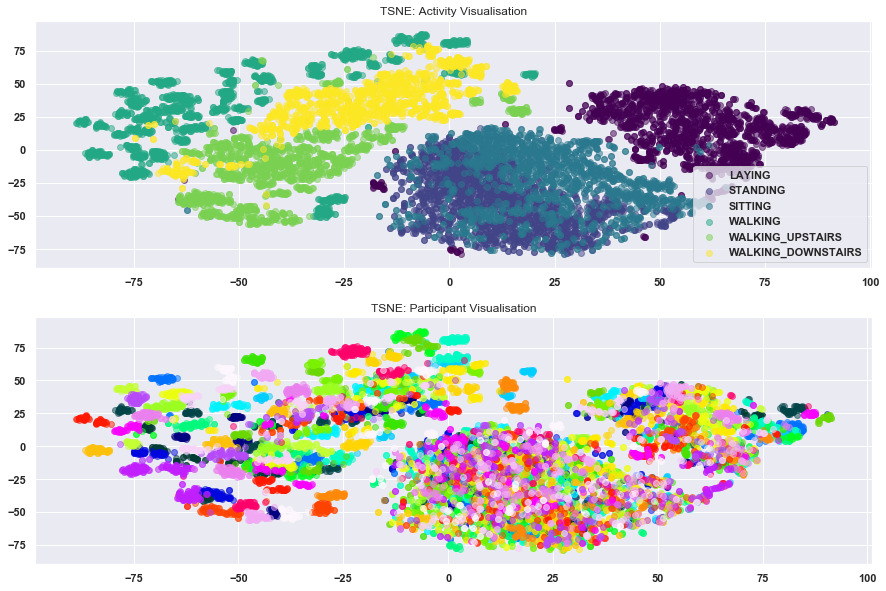

In [64]:
# Create datasets
tsne_data = both_df.copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components = 0.9, random_state = 4)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state = 4)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(15,10))

### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('TSNE: Activity Visualisation')
axarr[0].legend()


### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('TSNE: Participant Visualisation')
plt.show()

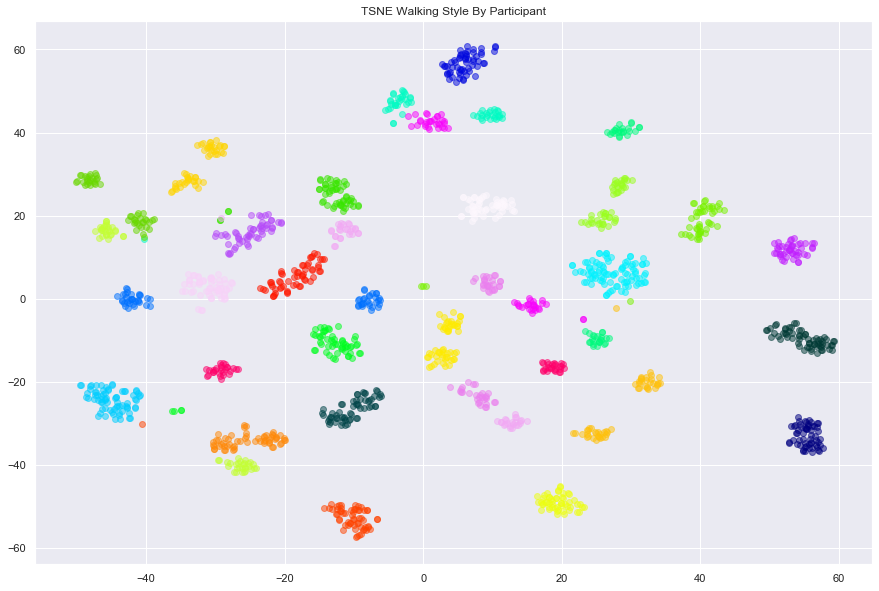

In [117]:
tsne_data = both_df[label=='WALKING'].copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions
pca = PCA(n_components=0.9, random_state=4)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=4)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(1, 1, figsize=(15,10))

### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr.set_title('TSNE Walking Style By Participant')
plt.show()

In [94]:
# PCA
# Store the data
data = []
# Iterate over each activity
for activity in label_counts.index:
    # Create dataset
    act_data = both_df[label==activity].copy()
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
    # Scale data
    scl = StandardScaler()
    act_data = scl.fit_transform(act_data)

    # Reduce dimensions
    pca = PCA(n_components=0.9, random_state=4)
    act_data = pca.fit_transform(act_data)

    
    # Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train, X_test, y_train, y_test = train_test_split(act_data, label_encoded, random_state=4)


    # Fit basic model
    print('Activity: {}'.format(activity))
    clf = MLPClassifier(activation = "tanh", max_iter = 1000, random_state = 44).fit(X_train, y_train)
    
    score = accuracy_score(y_true = y_test, y_pred = clf.predict(X_test))
    print('Accuracy: {:.4f}\n'.format(score))
    data.append([activity, score])

Activity: LAYING
Accuracy: 0.7963

Activity: STANDING
Accuracy: 0.6310

Activity: SITTING
Accuracy: 0.5416

Activity: WALKING
Accuracy: 1.0000

Activity: WALKING_UPSTAIRS
Accuracy: 0.9948

Activity: WALKING_DOWNSTAIRS
Accuracy: 0.9886



In [93]:
# Create dataset
act_data = both_df[label==activity].copy()
act_data_data = act_data.pop('Data')
act_subject_data = act_data.pop('subject')
    
# Scale data
scl = StandardScaler()
act_data = scl.fit_transform(act_data)

# Reduce dimensions
pca = PCA(n_components=0.9, random_state=4)
act_data = pca.fit_transform(act_data)

new = pd.DataFrame(act_data)
new

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-3.265641,-4.812538,-1.506469,3.742924,-1.925106,3.319085,-2.889604,-1.507548,-2.461779,-0.256653,...,-0.209906,-2.415123,-0.298372,-1.428360,1.152764,-0.183334,-0.187780,0.518603,1.063671,0.925536
1,-16.470143,-1.446996,0.521696,4.337562,1.744973,-1.570798,-1.394635,6.478190,0.690149,-0.199734,...,3.010427,2.090092,1.019857,-0.712097,0.175062,1.176777,-1.101888,-0.291727,0.999965,0.380515
2,-4.992412,-3.999271,-2.671677,-2.135443,1.108209,8.065021,-0.273283,-4.531281,0.165261,2.081936,...,-0.559157,-0.682155,0.415338,0.423145,1.344163,0.309578,0.496841,-0.547670,1.330831,0.588801
3,-13.417085,-1.292752,4.966542,1.344587,5.966093,-2.159510,-4.434106,4.744570,-0.446582,-1.328147,...,1.708222,1.773519,-0.853216,0.653168,0.216340,0.951176,0.101458,0.044041,-0.181625,0.440692
4,4.357146,-2.295787,9.998127,2.455181,0.245159,2.795645,-6.509336,-1.483184,-5.833459,-3.102550,...,-1.004117,-2.618550,-0.220552,0.458267,0.023603,0.508445,-0.296774,0.001180,0.123337,0.157467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,-16.223474,2.275975,-1.472806,-4.036407,-2.009198,-0.455693,1.530791,4.569468,4.795901,-0.384101,...,-1.065573,-0.383290,2.250102,1.460469,-1.248023,-1.721228,0.829626,1.110265,1.248594,0.768691
1402,-7.202665,2.318683,-5.180221,-3.902150,-4.072950,-3.007196,-1.910801,-2.647398,-0.710730,1.795614,...,-1.145919,0.130514,-0.969511,0.645271,0.309754,0.192487,0.243879,-1.119264,-0.410426,-0.594309
1403,15.743448,13.444064,-2.178484,-3.526376,2.348281,-6.188022,5.496105,5.120336,-1.940663,3.870324,...,-3.484325,2.685269,4.584752,0.248912,-0.301251,-0.806970,0.933405,-0.715324,-0.434094,1.486041
1404,-8.303191,-6.864051,2.419019,5.297702,4.713794,3.875747,-3.244385,3.534784,1.417243,-2.701797,...,-0.303179,0.808757,-0.146650,-0.207229,0.600381,0.987988,0.590121,-0.667629,0.129434,1.296899


In [81]:
tsne_data = both_df[label=='WALKING'].copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions
pca = PCA(n_components=0.9, random_state=4)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=4)
tsne_transformed = tsne.fit_transform(tsne_data)

In [91]:
# Split training testing data
enc = LabelEncoder()
label_encoded = enc.fit_transform(subject_data)
X_train, X_test, y_train, y_test = train_test_split(tsne_transformed, label_encoded, random_state=4)


# Fit basic model
print('Activity: WALKING'.format(activity))
clf = MLPClassifier(activation = "tanh", max_iter = 5000, random_state = 4).fit(X_train, y_train)
    
score = accuracy_score(y_true = y_test, y_pred = clf.predict(X_test))
print('Accuracy:', score)
data.append([activity, score])

Activity: WALKING
Accuracy: 0.9907192575406032


## Time Series

In [ ]:
standing_activity = training_data[training_data['Activity'] == 'WALKING']
# Reset the index for this dataframe
standing_activity = standing_activity.reset_index(drop=True)

# Set time series for each subject
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])
for row_number in range(standing_activity.shape[0]):
    if (row_number == 0 
        or standing_activity.iloc[row_number]['subject'] == standing_activity.iloc[row_number - 1]['subject']):
        time_series[index] = time
        time += 1
    else:
        time_series[index] = 1
        time = 2
    index += 1

# Combine the time_series with the standing_activity dataframe
time_series_df = pd.DataFrame({ 'Time': time_series })
standing_activity_df = pd.concat([standing_activity, time_series_df], axis = 1)

colors = cm.rainbow(np.linspace(0, 1, len(standing_activity_df['subject'].unique())))

# Create plot for each subject, which will all be displayed overlapping on one plot
id = 0
for subject in standing_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 12})
    plt.plot(standing_activity_df[standing_activity_df['subject'] == subject]['Time'], 
             standing_activity_df[standing_activity_df['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id], 
             label = 'Subject ' + str(subject),
             linewidth = 2)
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 10})
    id += 1